# GrabCut Algorithm

In [3]:
import cv2
import numpy as np

In [1]:
path=r"D:\Amjid_Ali\opencv\OpenCv\image processing\morphological tranformations\messie.jpeg"

In [3]:
image=cv2.imread(path)

In [4]:
mask=np.zeros((image.shape[:2]),dtype=np.uint8)

In [7]:
bgd=np.zeros((1,65),np.float64)
fgd=np.zeros((1,65),np.float64)

In [1]:
rect = (50,50,450,290)

In [13]:
cv2.grabCut(image,mask,rect,bgd,fgd,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[1.97681178e-01, 3.23827671e-01, 2.60915902e-01, 1.03927141e-01,
         1.13648107e-01, 8.80612645e+01, 8.72422807e+01, 9.21359255e+01,
         2.97290316e+01, 2.63360926e+01, 2.43251222e+01, 5.78257210e+01,
         5.41338037e+01, 5.90566902e+01, 5.09272840e+01, 1.39499378e+02,
         1.03374456e+02, 1.25624893e+02, 1.27497300e+02, 1.22780904e+02,
         2.46815557e+02, 1.50981563e+02, 7.99977174e+01, 1.50981563e+02,
         1.31065463e+02, 1.11533152e+02, 7.99977174e+01, 1.11533152e+02,
         1.83885788e+02, 1.11492847e+02, 9.39295067e+01, 9.43804086e+01,
         9.39295067e+01, 9.53584689e+01, 9.52262230e+01, 9.43804086e+01,
         9.52262230e+01, 1.20221811e+02, 1.46066421e+02, 8.27714316e+01,
         8.06296348e+01, 8.27714316e+01, 9.5

In [16]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

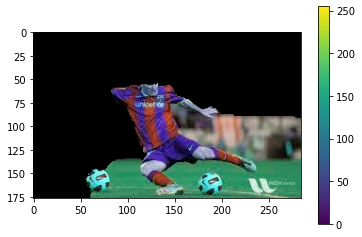

(<matplotlib.image.AxesImage at 0x24bb49ce2e0>,
 None)

In [23]:
img = image*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

# try this as well

In [61]:
image=cv2.imread("./m.jpg")
mask=np.zeros((image.shape[:2]),np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

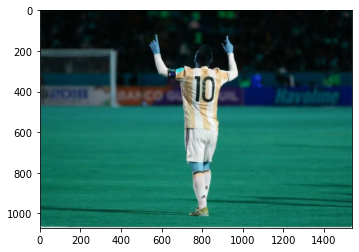

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image,'gray')
plt.show()

In [7]:
rect = (509,69,1036,1043)
mask, bgdModel, fgdModel = cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

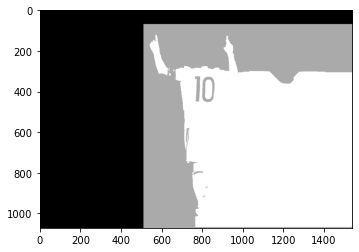

In [8]:
plt.imshow(mask,'gray')

In [9]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_seg = image*mask2[:,:,np.newaxis]

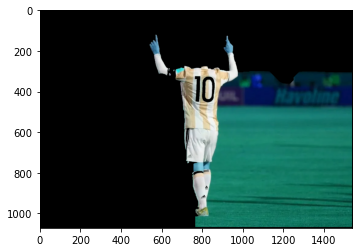

In [10]:
plt.imshow(img_seg,'gray')

# grabcut with mask

In [68]:
# forregound image
forground_image=cv2.resize(cv2.imread("./segmentforground.PNG"),(image.shape[:2][::-1]))
# edited image
edited_forground=cv2.resize(cv2.imread("./editedforgound.PNG"),(image.shape[:2][::-1]))

In [69]:
masked_image=cv2.subtract(edited_forground,forground_image)

In [70]:
gray_mask=cv2.cvtColor(masked_image,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray_mask,200,255,0)

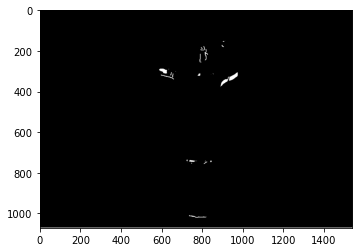

In [71]:
plt.imshow(thresh,'gray')
plt.show()

In [77]:
# mask=np.zeros(edited_forground.shape[:2])
mask[thresh==255]=1

In [78]:
mask, bgdModel, fgdModel = cv2.grabCut(image, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

In [79]:
mask_final = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_out = image*mask_final[:,:,np.newaxis]

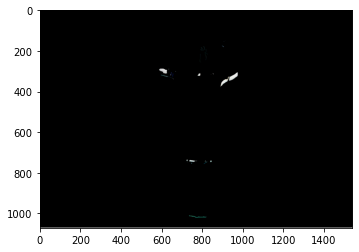

In [80]:
plt.imshow(img_out)